C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


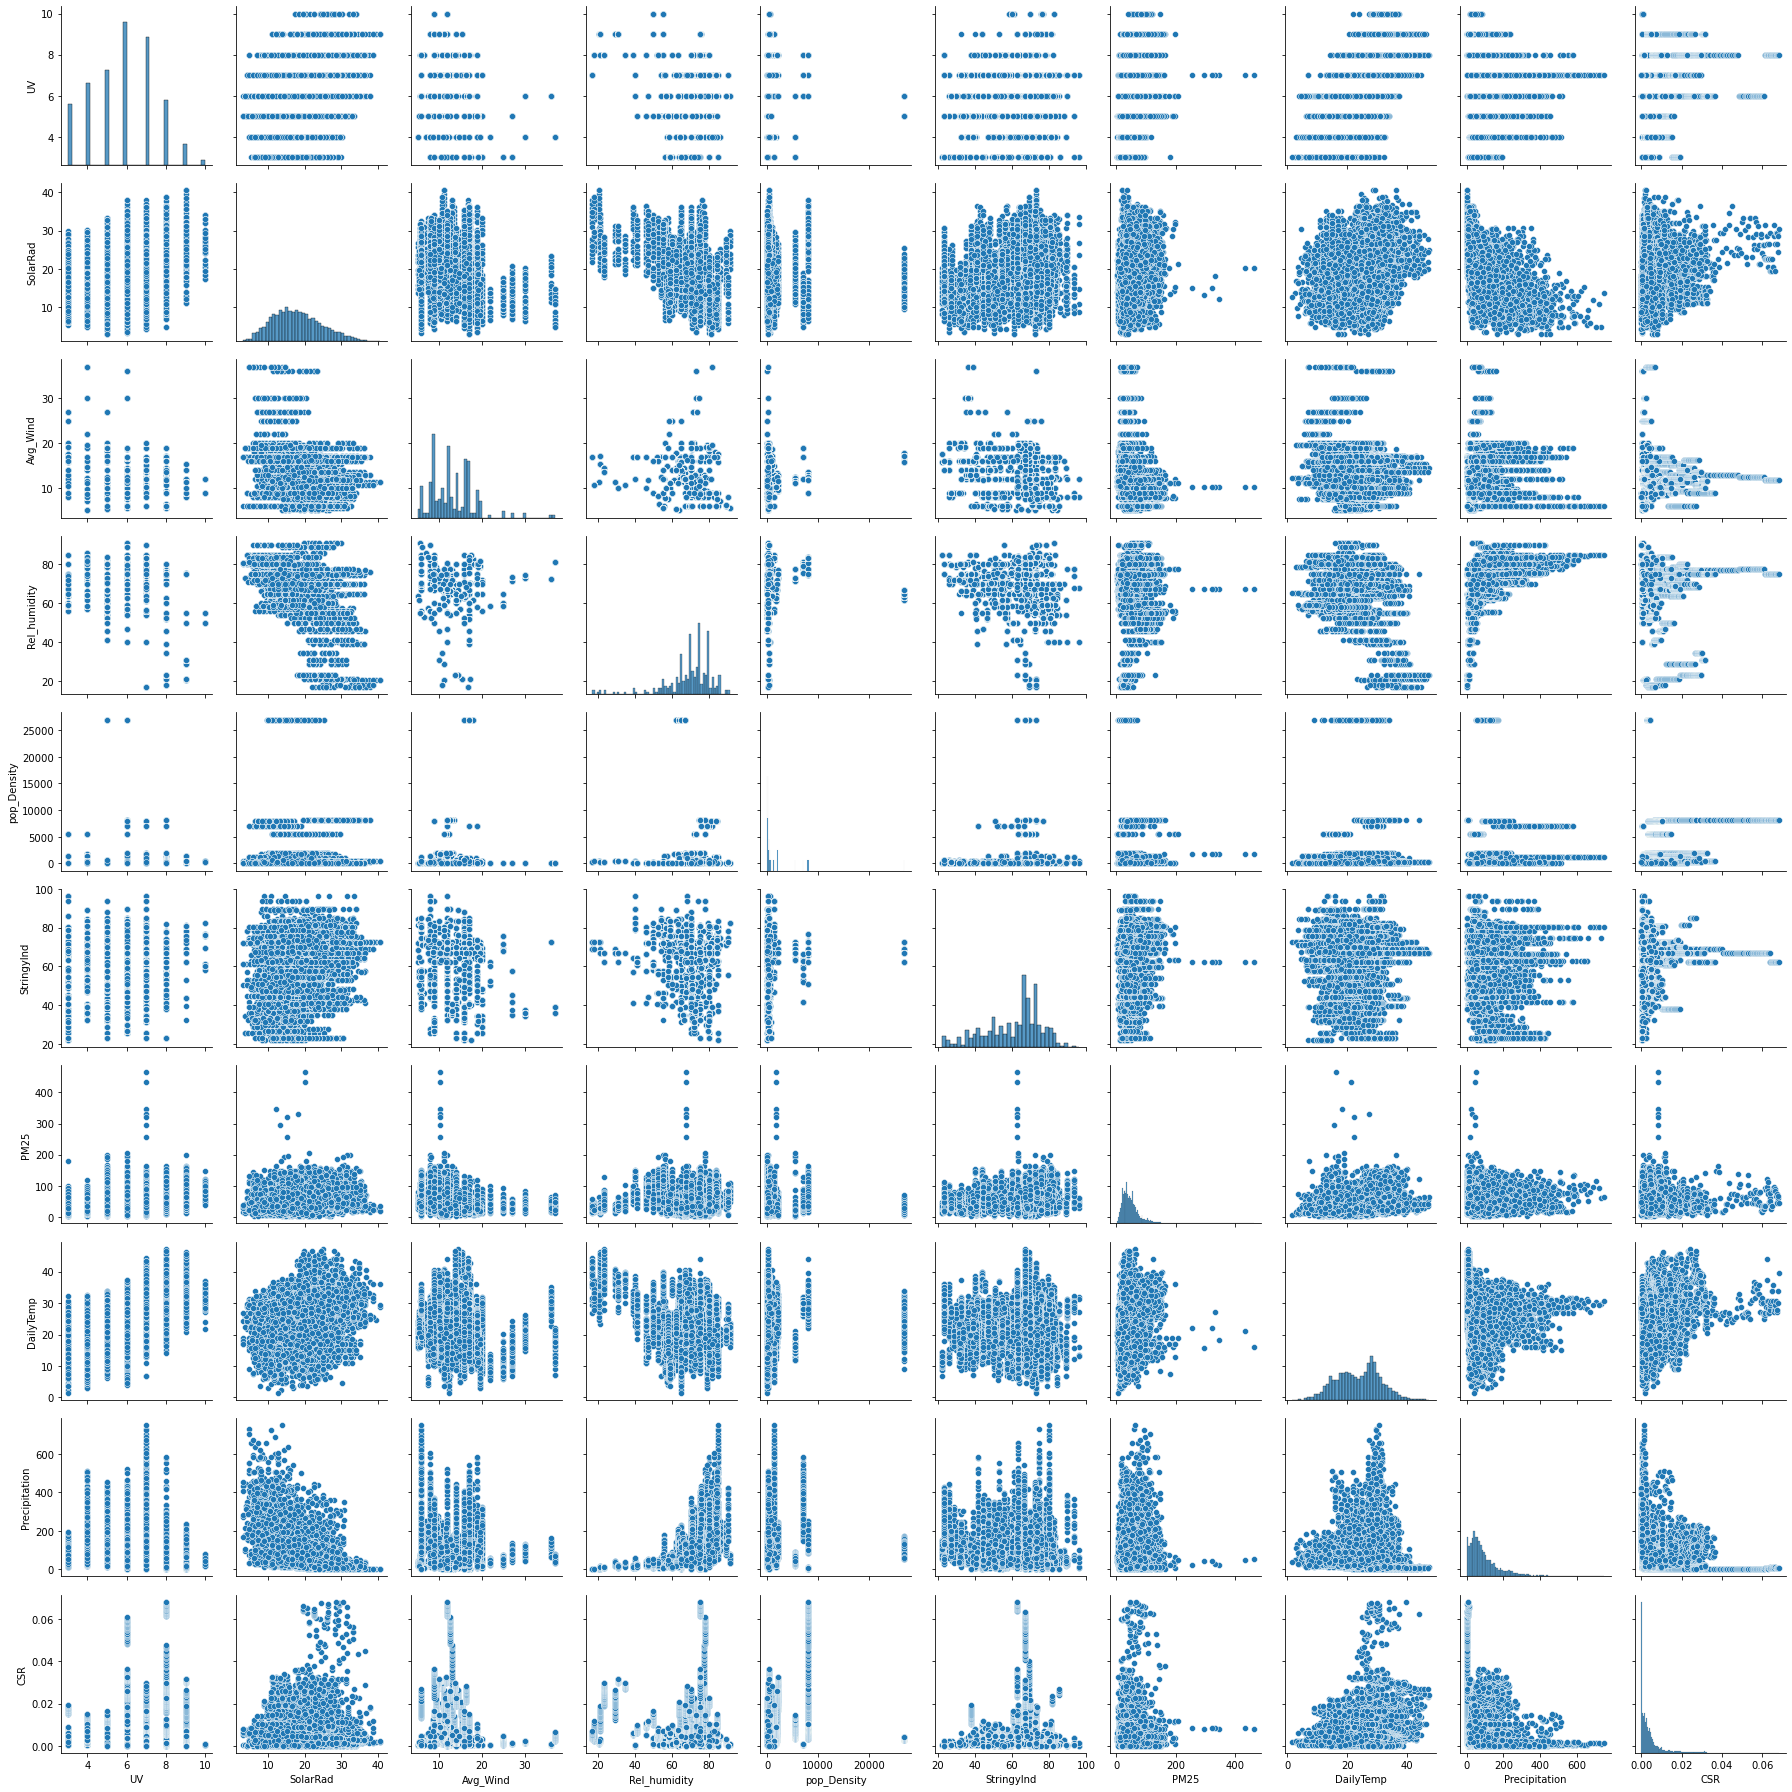

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: -0.13918383957134806
Best Hyperparameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': [22, 20, 10, 5], 'learning_rate_init': 0.05, 'solver': 'adam'}


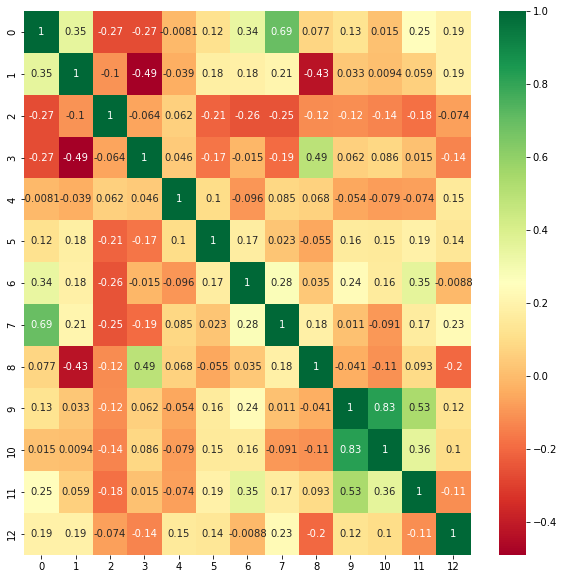

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score

## Standerdize the input training dataset ##
def scaling(X_train, X_test):  
    
    ##### Scaling the features ########
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test    


## Gridsearch to find the optimum values of different parameters of MLP regressor 
## ------------------------------------------------------------------------------

## Initialize the MLP model
model = MLPRegressor(max_iter=500)

## Initilize different tuples of the hidden layers
hiddenlayers = [ [22, 20, 10, 5], [22, 15, 8, 4], [22, 15, 5, 2] ]; 

## Initilize different values of the regularization parameters, alpha 
alpha = [x for x in np.linspace(0.0001, 0.05, num = 5) ]

## Initilize different values of the learning rates
learning_rate_init = [x for x in np.linspace(0.0001, 0.05, num=5) ]

## Initialize different grid search parameters 
param_grid_MLP = [{'solver' : ['adam'],
                  'hidden_layer_sizes' : hiddenlayers,
                   'activation' : ['logistic', 'relu'],
                   'alpha' : alpha,
                   'learning_rate_init' : learning_rate_init
                  }]

## Define the folds for cross validation   
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)

## Define the grid search using cross-validation (CV) and other predefined parameters
search = GridSearchCV(estimator=model, param_grid=param_grid_MLP, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, verbose=True)

## Read input and output dataset, and scaling the dataset
## ------------------------------------------------------
datasetHeader = pd.read_csv("finalTrainDataNoHeader.csv")
colName = datasetHeader.columns
dataset = pd.read_csv("finalTrainDataNoHeader.csv",header=None, skiprows=1)

## Converting from data frame to numpy data structure  
dataset.astype('int32').dtypes
data = dataset.to_numpy()
(r,c) = data.shape

## Total input dataset [13 input features]
inputData = data[:, 0:8]

## Output dataset [CSR = Cummulative number of Cases / Total population ]
CSR = data[:,-1]

## Pair-wise correlations plot
cols = ['UV', 'SolarRad', 'Avg_Wind', 'Rel_humidity', 'pop_Density', 'StringyInd', 'PM25', 'DailyTemp', 'Precipitation', 'CSR']
sns.pairplot(datasetHeader[cols],size=2.5)
plt.tight_layout()
#plt.savefig("C:/Users/HP/Documents/Applied Machine Learning I/Project/pairwiseplot.png", dpi=250)
plt.show()

## Get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
## Plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#plt.savefig("C:/Users/HP/Documents/Applied Machine Learning I/Project/correlationmatrix.png")

## Split the dataset into training and testing parts for the CSR
## -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(inputData, CSR, train_size=0.7, random_state=0)

## Scaling of the train and testing dataset ##
X_train, X_test = scaling(X_train, X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.fit_transform(y_test.reshape(-1, 1))

## Execute search
result = search.fit(X_train, y_train)

# Summarize the optimum parameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18671351163648808
0.24667063170419182


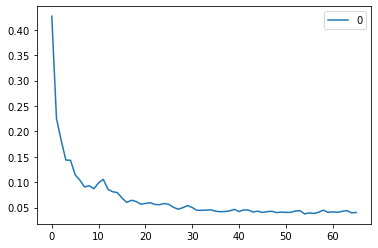

In [2]:
## Neural netwrok regressor for CSR ##
regrCSR = MLPRegressor(verbose=False, activation='relu', solver='adam', alpha = 0.0001, learning_rate_init=0.037525, hidden_layer_sizes=([22, 20, 10, 5]), max_iter=400)
regrCSR.fit(X_train, y_train)
pd.DataFrame(regrCSR.loss_curve_).plot()

## Train mean absolute error for CSR
predictionsTrain = regrCSR.predict(X_train)
print(mean_absolute_error(y_train, predictionsTrain) )

## Train mean absolute error for CSR
predictionsTest = regrCSR.predict(X_test)
print(mean_absolute_error(y_test, predictionsTest) )


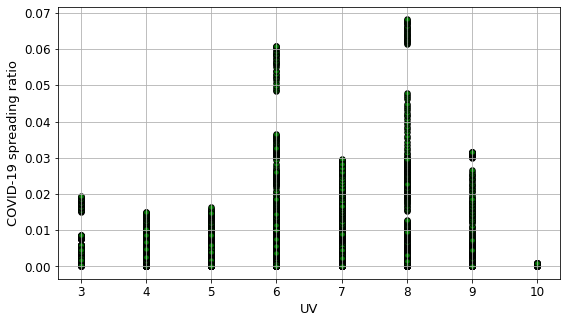

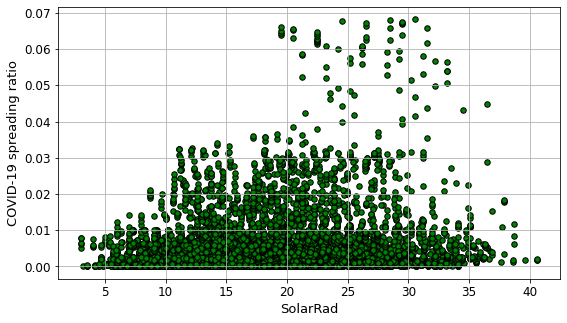

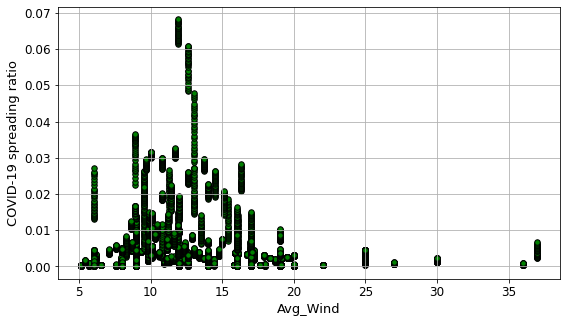

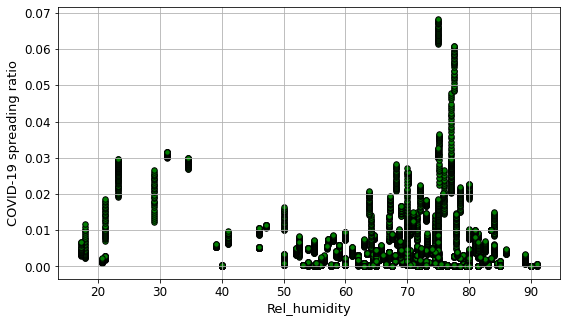

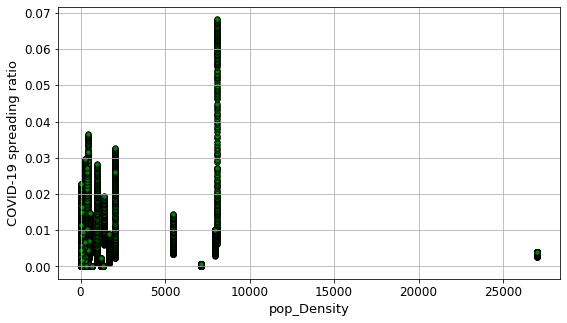

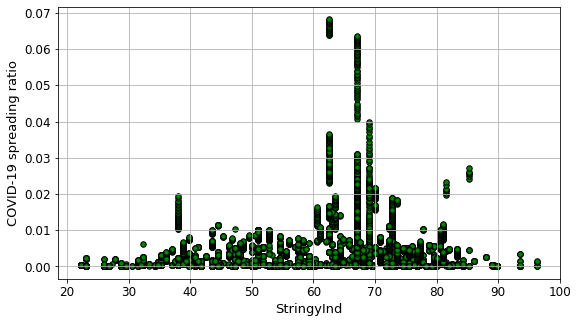

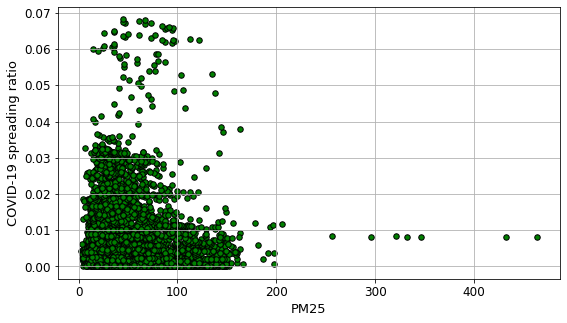

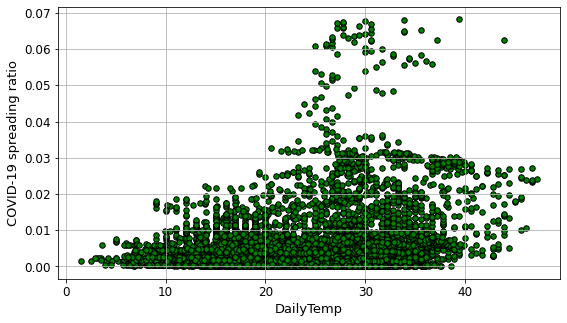

In [3]:
## Generating the correlation figures based on the CSR
for i in range(inputData.shape[1]):
    plt.figure(figsize=(9,5))
    plt.xlabel(colName[i],fontsize=13)
    plt.ylabel("COVID-19 spreading ratio",fontsize=13)
    plt.grid(1)
    plt.scatter(inputData[:,i], CSR, edgecolors=(0,0,0), s=30, c='g')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)